##Tarea 2 Caso convectivo

In [1]:
%matplotlib inline
%load_ext rmagic
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
from IPython.display import Latex


Automatically created module for IPython interactive environment


/home/sofia/anaconda/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


###cargamos el archivo y lo leemos con pyart
####caso 18 de Noviembre 2009

In [2]:
file='/home/sofia/radar_parana/DATOS/CFRad/20091118/cfrad.20091118_062002.000_to_20091118_062342.998_INTA_Par_v1_SUR.nc'
RadParConv=pyart.io.read_cfradial(file)


In [5]:
#Miramos las variables que tenemos en el elemento
RadParConv.fields.keys()
#RadParConv.fields['uPhiDP']['data'].min()


[u'uPhiDP', u'dBZ', u'KDP', u'RhoHV', u'ZDR']

###Graficamos los datos de la Primera elevación


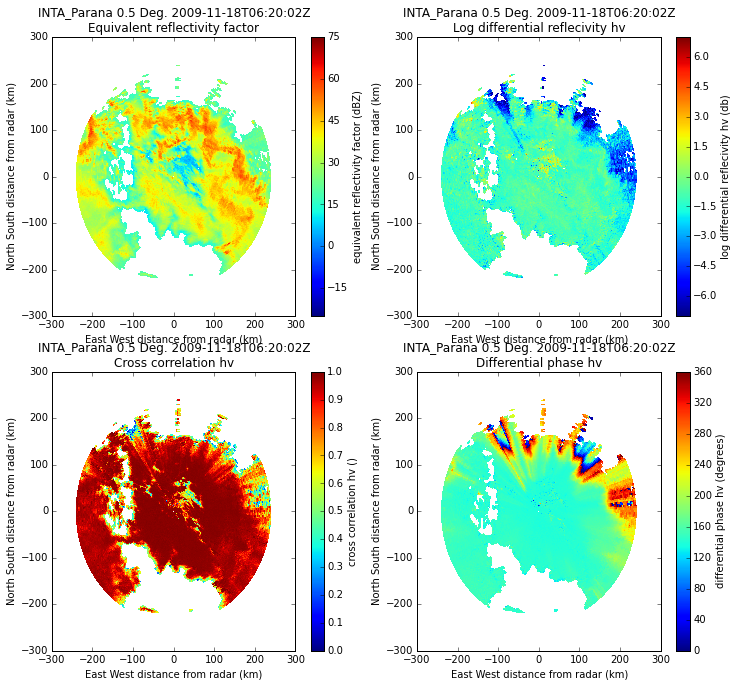

In [13]:
display = pyart.graph.RadarMapDisplay(RadParConv)

f = plt.figure(figsize = [12,11])

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=7)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360)



###Graficamos ahora la Segunda elevación 

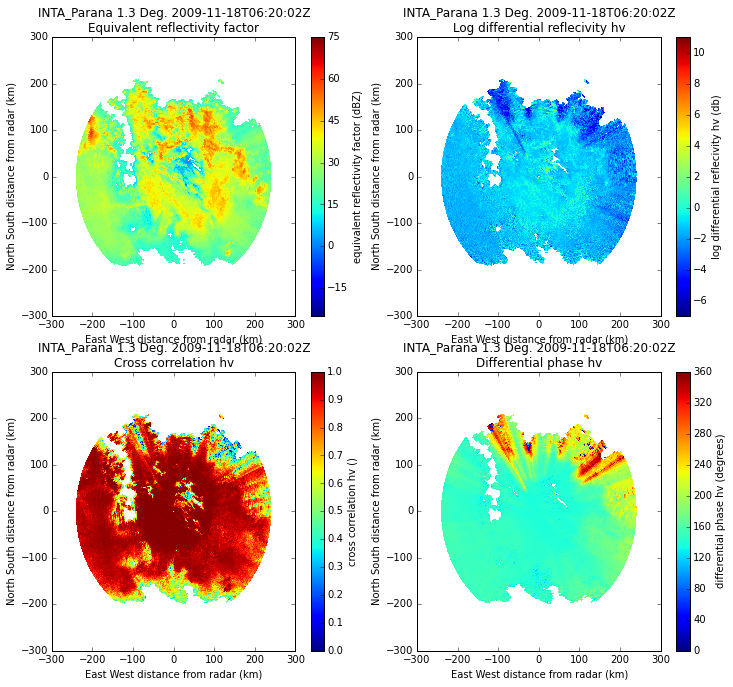

In [35]:
display = pyart.graph.RadarMapDisplay(RadParConv)
f = plt.figure(figsize = [12,11])

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=11,sweep=1)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1,sweep=1)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360,sweep=1)




###Graficamos mas elevaciones de la reflectividad para ver mejor la extensión que tiene  (extensión vertical )


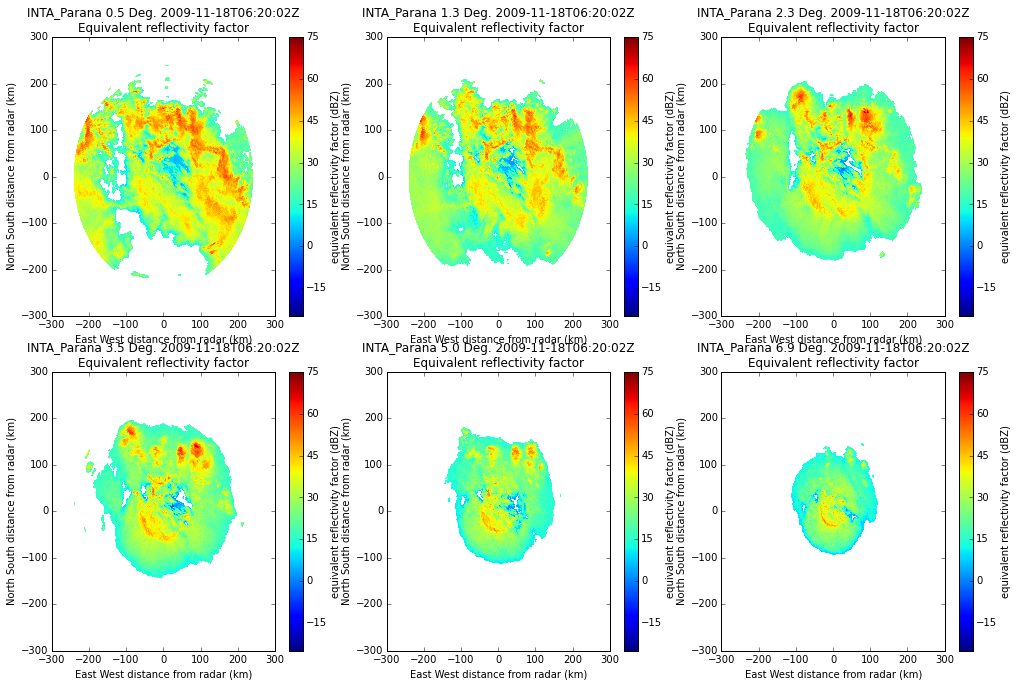

In [6]:
display = pyart.graph.RadarMapDisplay(RadParConv)
f = plt.figure(figsize = [17,11])

plt.subplot(2, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=0)
plt.subplot(2, 3, 2) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1)
plt.subplot(2, 3, 3) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=2)
plt.subplot(2, 3, 4) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=3)
plt.subplot(2, 3, 5) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=4)
plt.subplot(2, 3, 6) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=5)

###Hacemos zoom en la zona de celdas convectivas 

(0, 200)

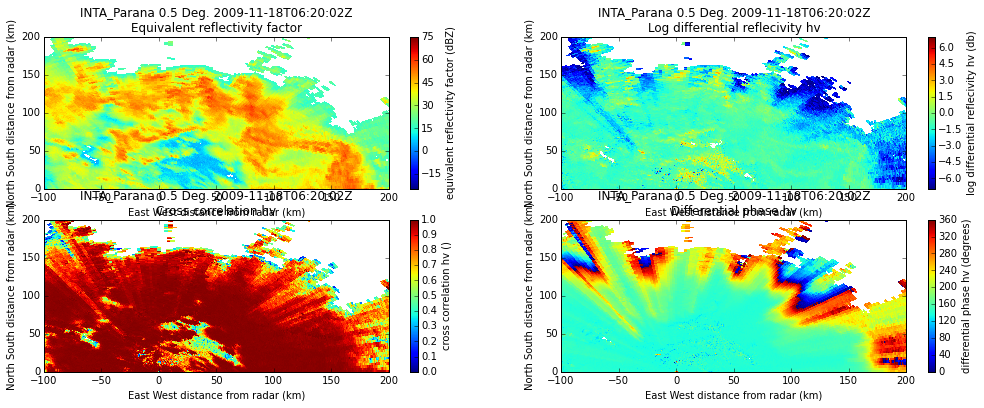

In [49]:
#de la primera elevación

display = pyart.graph.RadarMapDisplay(RadParConv)

f = plt.figure(figsize = [17,6])
minlon=RadParConv.longitude['data']-1.
maxlon=RadParConv.longitude['data']+1.
minlat=RadParConv.latitude['data']-1.
maxlat=RadParConv.latitude['data']+1.

plt.subplot(2, 2, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 2) 
display.plot_ppi('ZDR',vmin=-7,vmax=7)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 3) 
display.plot_ppi('RhoHV',vmin=0,vmax=1)
plt.xlim(-100,200)
plt.ylim(0,200)
plt.subplot(2, 2, 4) 
display.plot_ppi('uPhiDP',vmin=0,vmax=360) 
plt.xlim(-100,200)
plt.ylim(0,200)

###Analicemos un poco el comportamiento de las variables

In [8]:
#Armamos dos archivos con los datos de las dos primeras elevaciones
RadParConv1=RadParConv.extract_sweeps([0])
RadParConv2=RadParConv.extract_sweeps([1])
#Miramos la variable dBZ
dBZ1=RadParConv1.fields['dBZ']['data']
dBZ2=RadParConv2.fields['dBZ']['data']
#Miramos la variable ZDR, Reflectividad diferencial
ZDR1=RadParConv1.fields['ZDR']['data']
ZDR2=RadParConv2.fields['ZDR']['data']
#Miramos la variable RhoHV, coeficiente de correlacion
RhoHV1=RadParConv1.fields['RhoHV']['data']
RhoHV2=RadParConv2.fields['RhoHV']['data']
#Miramos la variable PhiDP, diferencia de fase
PhiDP1=RadParConv1.fields['uPhiDP']['data']
PhiDP2=RadParConv2.fields['uPhiDP']['data']

#Desenmascaramos los datos
dBZ1.filled()
dBZ2.filled()
ZDR1.filled()
ZDR2.filled()
RhoHV1.filled()
RhoHV2.filled()
PhiDP1.filled()
PhiDP2.filled()
0


0

In [9]:
###si me quiero qedar solo con la zona convectiva 
zdr1copia = RadParConv1.fields['ZDR']['data'].copy()
z1copia = RadParConv1.fields['dBZ']['data'].copy()
rhohv1copia = RadParConv1.fields['RhoHV']['data'].copy()
phidp1copia = RadParConv1.fields['uPhiDP']['data'].copy()
#Enmascaramos donde Z>45
   
zdr1copia = np.ma.masked_where(RadParConv1.fields['dBZ']['data'] < 45,zdr1copia)
z1copia = np.ma.masked_where(RadParConv1.fields['dBZ']['data'] < 45,z1copia)
rhohv1copia = np.ma.masked_where(RadParConv1.fields['dBZ']['data'] < 45,rhohv1copia)
phidp1copia = np.ma.masked_where(RadParConv1.fields['dBZ']['data'] < 45,phidp1copia)


RadParConv1.add_field_like('ZDR', 'zdr_alto',zdr1copia)
RadParConv1.add_field_like('dBZ', 'dbz_alto',z1copia)
RadParConv1.add_field_like('RhoHV', 'rhohv_alto',rhohv1copia)
RadParConv1.add_field_like('uPhiDP', 'phidp_alto',phidp1copia)

#Miramos las variables en zona convectiva
aZDR1=RadParConv1.fields['zdr_alto']['data']
adBZ1=RadParConv1.fields['dbz_alto']['data']
aRhoHV1=RadParConv1.fields['rhohv_alto']['data']
aPhiDP1=RadParConv1.fields['phidp_alto']['data']

#Desenmascaramos los datos
aZDR1.filled()
adBZ1.filled()
aRhoHV1.filled()
aPhiDP1.filled()
0

0

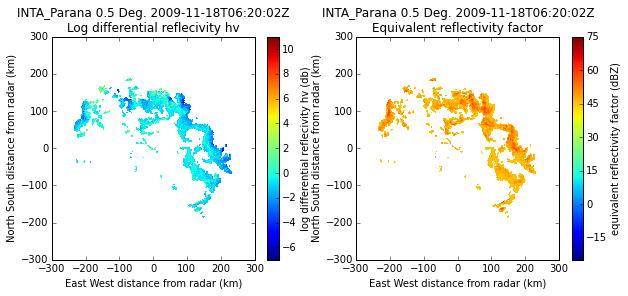

In [45]:
###ploteo solo eso para confirmar qe lo que hice esta bien 

display = pyart.graph.RadarMapDisplay(RadParConv1)
f = plt.figure(figsize = [10,4])

plt.subplot(1, 2, 1) 
display.plot_ppi('zdr_alto',vmin=-7,vmax=11)
plt.subplot(1, 2, 2) 
display.plot_ppi('dbz_alto',vmin=-25,vmax=75)



In [10]:
#Armamos las tablas comparando las variables
from ipy_table import *

dbz = [
    ['dBZ:Elev_1', 'Minimo', 'Maximo', 'Media','Desvio Estandar'],
    ['Toda la Zona',dBZ1.min(),dBZ1.max(),dBZ1.mean(),dBZ1.std()], 
    ['Zona Convectiva',adBZ1.min(),adBZ1.max(),adBZ1.mean(),adBZ1.std()]];
zdr = [
    ['ZDR: Elev 1', 'Minimo', 'Maximo', 'Media','Desvio Estandar'],
    ['Toda la Zona',ZDR1.min(),ZDR1.max(),ZDR1.mean(),ZDR1.std()], 
    ['Zona Convectiva',aZDR1.min(),aZDR1.max(),aZDR1.mean(),aZDR1.std()]];

rohv = [
    ['RhoHV Elev 1', 'Minimo', 'Maximo', 'Media','Desvio Estandar'],
    ['Toda la Zona',RhoHV1.min(),RhoHV1.max(),RhoHV1.mean(),RhoHV1.std()], 
    ['Zona Convectiva',aRhoHV1.min(),aRhoHV1.max(),aRhoHV1.mean(),aRhoHV1.std()]];

phidp = [
    ['PhiDP Elev 1', 'Minimo', 'Maximo', 'Media','Desvio Estandar'],
    ['Toda la Zona',PhiDP1.min(),PhiDP1.max(),PhiDP1.mean(),PhiDP1.std()], 
    ['Zona Convectiva',aPhiDP1.min(),aPhiDP1.max(),aPhiDP1.mean(),aPhiDP1.std()]];



###dBZ Reflectividad

In [11]:
make_table(dbz)
set_cell_style(0,0, bold=True)


dBZ:Elev_1,Minimo,Maximo,Media,Desvio Estandar
Toda la Zona,2.5,63.5,32.1148,10.6323
Zona Convectiva,45.0,63.5,48.9798,3.1907


###ZDR Diferencial de reflectividad

In [12]:
make_table(zdr)
set_cell_style(0,0, bold=True)


ZDR: Elev 1,Minimo,Maximo,Media,Desvio Estandar
Toda la Zona,-8.0,10.6614,-1.0190,1.0513
Zona Convectiva,-6.66142,4.12598,-0.7231,0.8813


###RhoHV Coeficiente de correlacion

In [13]:
make_table(rohv)
set_cell_style(0,0, bold=True)



RhoHV Elev 1,Minimo,Maximo,Media,Desvio Estandar
Toda la Zona,0.015748,1.0,0.9231,0.1343
Zona Convectiva,0.488189,1.0,0.9600,0.0457



###PhiDP  Diferencia de fase

In [14]:
make_table(phidp)
set_cell_style(0,0, bold=True)


PhiDP Elev 1,Minimo,Maximo,Media,Desvio Estandar
Toda la Zona,0.0439453,359.967,157.3983,39.1179
Zona Convectiva,1.34038,359.681,183.4779,41.0678


In [103]:
##cargo datos del caso estratiforme 
file='/home/sofia/radar_parana/DATOS/CFRad/20090527/cfrad.20090527_145347.000_to_20090527_145735.000_INTA_Par_v1_SUR.nc'
RadParStrat=pyart.io.read_cfradial(file)
RadParStrat.fields.keys()
RadParConv.fields['uPhiDP']['data'].min()

0.016479492

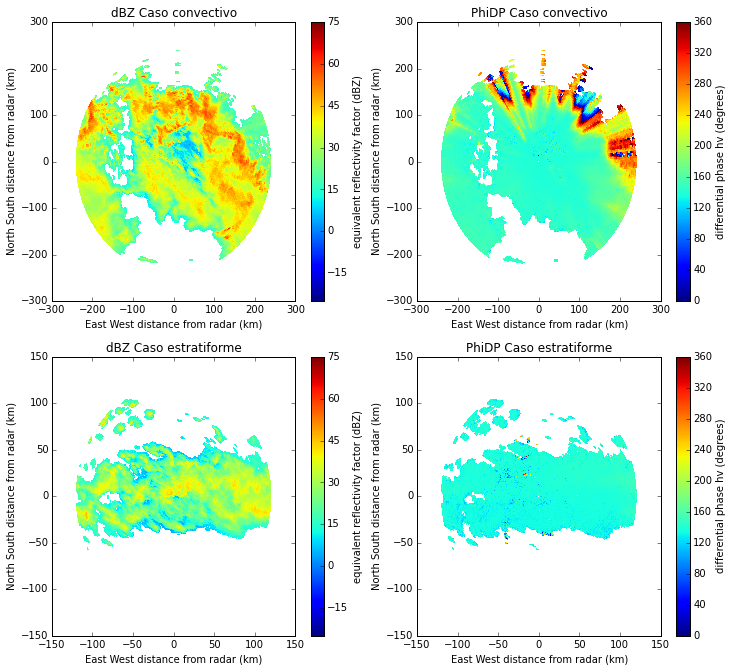

In [107]:
###Graficamos reflectividad horizontal y PhiDP en ambos casos (convectivo y estratiforme) Para la primera elevacion
displayconv = pyart.graph.RadarMapDisplay(RadParConv)
displaystra = pyart.graph.RadarMapDisplay(RadParStrat)

f = plt.figure(figsize = [12,11])

plt.subplot(2, 2, 1) 
displayconv.plot_ppi('dBZ',vmin=-25,vmax=75,title='dBZ Caso convectivo')
plt.subplot(2, 2, 2) 
displayconv.plot_ppi('uPhiDP',vmin=0,vmax=360,title='uPhiDP Caso convectivo')
plt.subplot(2, 2, 3) 
displaystra.plot_ppi('dBZ',vmin=-25,vmax=75,title='dBZ Caso estratiforme')
plt.subplot(2, 2, 4) 
displaystra.plot_ppi('uPhiDP',vmin=0,vmax=360,title='uPhiDP Caso estratiforme')



###Se puede observar como en el caso convectivo el  $ \phi_{dp}$ tiene un defasaje importante en la zona convectiva , mientras que en el caso estratiforme es bastante constante 